Importancia de cada variable en el modelo:
Trigliceridos inicio: 0.1681
Edad: 0.1221
Plicometro Antes (mm): 0.1139
HDL-colesterol inicio: 0.0942
Trocanter antes (cm): 0.0861
IMC antes: 0.0781
Altura (cm): 0.0756
Duración: 0.0685
LDL-colesterol inicio: 0.0669
Cintura cadera antes: 0.0595
Apofisis antes (cm): 0.0513
Sexo: 0.0157


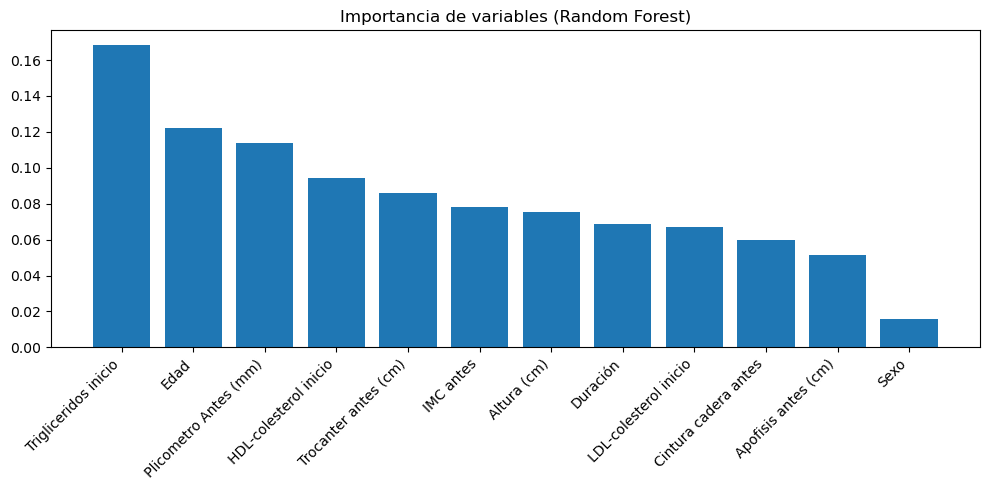

R² del modelo: 0.61


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Variables a usar (ajusta si necesitas)
features = [
    'Duración', 'Edad', 'Sexo', 'Altura (cm)', 'IMC antes',
    'Plicometro Antes (mm)', 'Cintura cadera antes', 'HDL-colesterol inicio',
    'LDL-colesterol inicio', 'Trigliceridos inicio', 'Trocanter antes (cm)', 'Apofisis antes (cm)'
]

X = df[features]
y = df['Energia (KJ)']

# Entrenamiento / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importancia de variables
importancias = rf.feature_importances_
indices = importancias.argsort()[::-1]

# Mostrar
print("Importancia de cada variable en el modelo:")
for i in indices:
    print(f"{features[i]}: {importancias[i]:.4f}")

# Si quieres graficar:
plt.figure(figsize=(10,5))
plt.bar([features[i] for i in indices], importancias[indices])
plt.xticks(rotation=45, ha='right')
plt.title("Importancia de variables (Random Forest)")
plt.tight_layout()
plt.show()

# También puedes ver el R2 del modelo:
from sklearn.metrics import r2_score
y_pred = rf.predict(X_test)
print(f"R² del modelo: {r2_score(y_test, y_pred):.2f}")


In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Cargar los datos
archivo = 'TFG_TECAR_IA_datos_formato_filas.1.csv'
df = pd.read_csv(archivo, encoding='utf-8-sig')

# 2. Definir las variables a usar
features = [
    'Trigliceridos inicio',    # Triglicéridos inicio
    'Edad',                    # Edad
    'Plicometro Antes (mm)',   # Plicómetro Antes (mm)
    'HDL-colesterol inicio',   # HDL-colesterol inicio
    'Trocanter antes (cm)',    # Trocanter antes (cm)
    'IMC antes',               # IMC antes
    'Altura (cm)',             # Altura (cm)
    'Duración',                # Duración
    'Sexo'                     # Sexo
]
target = 'Energia (KJ)'

# 3. Filtrar los datos
X = df[features]
y = df[target]

# 4. Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. Predicciones y métricas
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest -> MAE: {mae:.2f} KJ | RMSE: {rmse:.2f} KJ | R²: {r2:.2f}")

# 7. Importancia de las variables
importances = rf.feature_importances_
importancia_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)
print(importancia_df)
import joblib
joblib.dump(rf, 'modelo_tecar.pkl')



Random Forest -> MAE: 15.90 KJ | RMSE: 22.20 KJ | R²: 0.61
                Variable  Importancia
2  Plicometro Antes (mm)     0.168130
0   Trigliceridos inicio     0.167965
3  HDL-colesterol inicio     0.129279
1                   Edad     0.126684
7               Duración     0.117946
4   Trocanter antes (cm)     0.117580
5              IMC antes     0.084416
6            Altura (cm)     0.071143
8                   Sexo     0.016858


D:\Descargas\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['modelo_tecar_rf_solo_vars.pkl']